In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os

In [3]:
kmin=0.01
kmax=0.1
grid = 128

#theta = np.linspace(0, np.pi, 50)

In [4]:
k_range = np.linspace(kmin, kmax, 50)
print(k_range)

[0.01       0.01183673 0.01367347 0.0155102  0.01734694 0.01918367
 0.02102041 0.02285714 0.02469388 0.02653061 0.02836735 0.03020408
 0.03204082 0.03387755 0.03571429 0.03755102 0.03938776 0.04122449
 0.04306122 0.04489796 0.04673469 0.04857143 0.05040816 0.0522449
 0.05408163 0.05591837 0.0577551  0.05959184 0.06142857 0.06326531
 0.06510204 0.06693878 0.06877551 0.07061224 0.07244898 0.07428571
 0.07612245 0.07795918 0.07979592 0.08163265 0.08346939 0.08530612
 0.08714286 0.08897959 0.09081633 0.09265306 0.0944898  0.09632653
 0.09816327 0.1       ]


# read in

In [7]:

# Define the path where the CSV files are stored
df_path = '/home/gremlin/Msc Project/Bk_tables/redshift_space_new/equil/0.01_0.1/'

# Define the file name you want to read
file_name = 'Bk.csv'  # Replace 'Bk.csv' with the actual file name if different

# Construct the full file path
file_path = os.path.join(df_path, file_name)

if os.path.exists(file_path):
    # Load the CSV into a DataFrame
    df = pd.read_csv(file_path)
    print("Loaded DataFrame:\n", df)

Loaded DataFrame:
               Bk          Bk_2          Bk_3          Bk_4          Bk_5  \
0   4.194513e+09 -6.909504e+09  1.380985e+09  3.581213e+09  2.220129e+10   
1   6.475826e+09 -5.209782e+08 -6.044214e+09  7.295937e+09  2.432174e+10   
2  -6.599249e+09  2.695001e+09  7.202289e+09 -3.568500e+09  6.943138e+09   
3  -3.952689e+09  2.667524e+09  1.065640e+10 -1.800488e+09  2.380674e+09   
4  -3.749952e+09 -2.905912e+09  7.523681e+09  1.219414e+09  5.799948e+08   
5  -3.201089e+09 -4.668582e+09  8.574254e+09  4.588026e+08 -1.875677e+09   
6  -1.505335e+09 -4.292287e+09  3.208973e+09  1.214217e+09 -1.247725e+09   
7   5.781563e+08 -2.103845e+09  1.306717e+08  4.912197e+09  3.587760e+08   
8  -1.650067e+08  1.756556e+09  5.730716e+08  5.580068e+09  2.909797e+09   
9   1.759066e+09  8.400225e+08  1.888510e+09  4.667088e+09  4.213008e+09   
10  1.514213e+09  1.554719e+08  2.870855e+09  1.313245e+09  2.871327e+09   
11 -4.522672e+08  2.009167e+09  4.527905e+08 -1.025601e+08  4.041428e

Raw Bk v theta

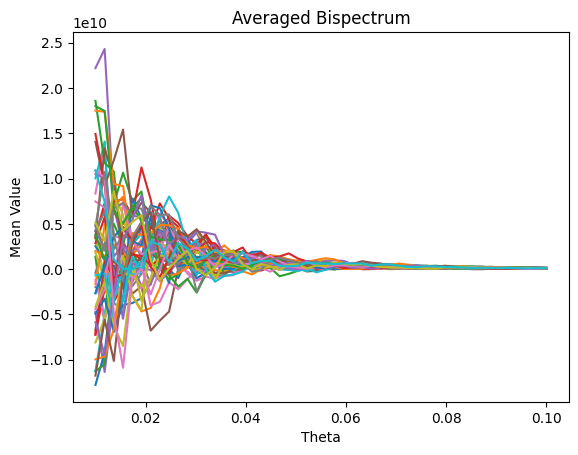

In [5]:

plt.plot(k_range,df)
plt.title('Averaged Bispectrum')
plt.xlabel('Theta')
plt.ylabel('Mean Value')
plt.show()

In [8]:
#read in real space
# Define the path where the CSV files are stored
df_path = '/home/gremlin/Msc Project/Bk_tables/redshift_space_new/equil/0.01_0.1'

# Define the file name you want to read
file_name = 'Bk_real.csv'  # Replace 'Bk.csv' with the actual file name if different

# Construct the full file path
file_path = os.path.join(df_path, file_name)

if os.path.exists(file_path):
    # Load the CSV into a DataFrame
    df_real = pd.read_csv(file_path)
    print("Loaded DataFrame:\n", df_real)


Loaded DataFrame:
               Bk          Bk_2          Bk_3          Bk_4          Bk_5  \
0   3.913493e+09 -3.661951e+09  4.619669e+08  5.441945e+08  1.444783e+10   
1   5.397575e+09 -2.922843e+08 -3.891302e+09  3.429814e+09  1.563602e+10   
2  -3.936347e+09  2.749700e+08  2.976265e+09 -1.666072e+09  4.804096e+09   
3  -2.297537e+09  1.702650e+09  5.149049e+09 -1.046059e+09  1.152538e+09   
4  -1.540912e+09 -2.111744e+09  3.915425e+09  9.637761e+07 -2.876580e+08   
5  -1.021447e+09 -2.017162e+09  4.775776e+09 -1.519115e+08 -1.811875e+09   
6  -6.374231e+08 -2.425622e+09  1.480337e+09  4.851956e+08 -6.082794e+08   
7   8.270270e+08 -9.475561e+08 -2.468298e+07  3.345395e+09  3.742359e+08   
8   5.927419e+07  1.073033e+09  2.898856e+08  3.701159e+09  1.814255e+09   
9   8.188480e+08  4.945152e+07  1.295456e+09  3.076472e+09  2.781647e+09   
10  8.926908e+08 -4.527046e+07  1.696444e+09  8.815420e+08  1.713754e+09   
11 -2.980815e+08  1.212351e+09  2.979674e+08 -9.151382e+07  2.335704e

# Avg Bk

In [9]:
#average Redshift space
# Calculate the row means
avg = df.mean(axis=1)
avg_df = avg.to_frame(name='Average')  # Convert Series to DataFrame

# calc row std
std = df.std(axis=1)
avg_df['Standard Deviation'] = std

# Generate theta values
#theta = np.linspace(0, np.pi, 100)  # Ensure the length matches the number of rows

# Add the theta column to the DataFrame
avg_df['k'] = np.array(k_range)

#---------------------------

#average real space
# Calculate the row means
avg_real = df_real.mean(axis=1)
std_real = df_real.std(axis=1)


avg_df['Average real'] = avg_real
avg_df['Std real'] = std_real



# Display the final DataFrame
print(avg_df)



#save into csv
folder_path = '/home/gremlin/Msc Project/Bk_tables/redshift_space_new/equil/0.01_0.1/'
file_name = 'Bk_avg.csv'

avg_df.to_csv(folder_path + file_name)




         Average  Standard Deviation         k  Average real      Std real
0   1.814123e+09        8.536494e+09  0.010000  7.605124e+08  5.241349e+09
1   2.628637e+09        7.930691e+09  0.011837  1.262022e+09  4.964512e+09
2   1.216911e+09        5.494811e+09  0.013673  6.331567e+08  3.407298e+09
3   1.635532e+09        4.823961e+09  0.015510  1.024732e+09  2.867568e+09
4   2.008439e+09        2.880435e+09  0.017347  1.159611e+09  1.747937e+09
5   2.231189e+09        3.537165e+09  0.019184  1.369441e+09  2.027941e+09
6   2.175056e+09        3.057495e+09  0.021020  1.264601e+09  1.766296e+09
7   2.268696e+09        2.668799e+09  0.022857  1.374057e+09  1.490140e+09
8   2.342593e+09        2.492436e+09  0.024694  1.414173e+09  1.454838e+09
9   1.924826e+09        1.880863e+09  0.026531  1.098307e+09  1.181703e+09
10  1.479450e+09        1.166442e+09  0.028367  8.313564e+08  7.448089e+08
11  1.220213e+09        1.641803e+09  0.030204  7.174032e+08  1.017529e+09
12  1.249581e+09        1

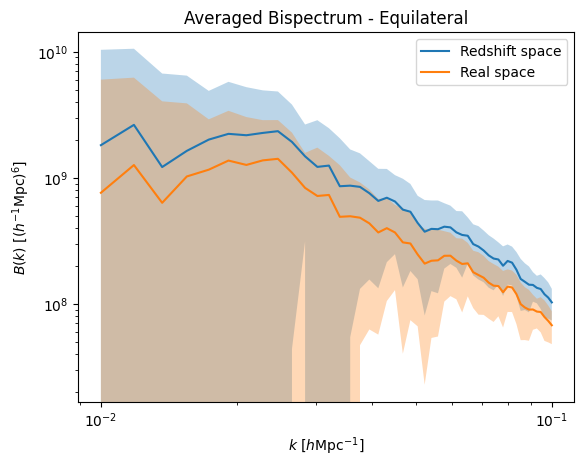

In [10]:
# Plot the average line for Redshift space
plt.plot(avg_df['k'], avg_df['Average'], linestyle='-', label='Redshift space')

# Shaded region for the error in Redshift space
plt.fill_between(avg_df['k'], 
                 avg_df['Average'] - avg_df['Standard Deviation'], 
                 avg_df['Average'] + avg_df['Standard Deviation'], alpha=0.3)

# Plot the average line for Real space
plt.plot(avg_df['k'], avg_df['Average real'], linestyle='-', label='Real space')

# Shaded region for the error in Real space
plt.fill_between(avg_df['k'], 
                 avg_df['Average real'] - avg_df['Std real'], 
                 avg_df['Average real'] + avg_df['Std real'],  alpha=0.3)

# Set the title and axis labels
plt.title('Averaged Bispectrum - Equilateral')
plt.xlabel(r'$k~[h{\rm Mpc}^{-1}]$')
plt.ylabel(r'$B(k)~[(h^{-1}{\rm Mpc})^6]$')

# Set the scales to logarithmic
plt.xscale('log')
plt.yscale('log')

# Show the legend and the plot
plt.legend()
plt.show()

# read in the theory bk

In [31]:
#LOAD IN ALREADY AVERAED Bk

# Define the path where the CSV files are stored
df_path = '/home/gremlin/Msc Project/Bk_tables/redshift_space_new/equil/'

# Define the file name you want to read
file_name = 'Bk_avg1.csv'  # Replace 'Bk.csv' with the actual file name if different

# Construct the full file path
file_path = os.path.join(df_path, file_name)

if os.path.exists(file_path):
    # Load the CSV into a DataFrame
    avg_df = pd.read_csv(file_path)
    print("Loaded DataFrame:\n", avg_df)

Loaded DataFrame:
     Unnamed: 0       Average  Standard Deviation         k  Average real  \
0            0  7.264173e+08        4.566165e+08  0.040000  4.067506e+08   
1            1  7.051525e+08        5.139909e+08  0.040816  3.988505e+08   
2            2  6.507175e+08        4.823816e+08  0.041633  3.670314e+08   
3            3  6.646748e+08        4.860917e+08  0.042449  3.828615e+08   
4            4  7.204744e+08        4.358788e+08  0.043265  4.134073e+08   
5            5  7.553270e+08        4.816230e+08  0.044082  4.351866e+08   
6            6  6.486200e+08        4.006152e+08  0.044898  3.683466e+08   
7            7  6.611851e+08        4.231733e+08  0.045714  3.764022e+08   
8            8  5.589385e+08        4.240840e+08  0.046531  3.074297e+08   
9            9  5.462019e+08        4.062396e+08  0.047347  2.988940e+08   
10          10  5.423710e+08        3.514544e+08  0.048163  3.068888e+08   
11          11  5.085394e+08        3.611373e+08  0.048980  2.838425e

In [51]:
# Define the path where the CSV files are stored
df_path = '/home/gremlin/Msc Project/Bk_tables/theory/sigma/'

# Define the file name you want to read
file_name = 'Theory_equil_0.04_0.08.csv'  # Replace 'Bk.csv' with the actual file name if different

# Construct the full file path
file_path = os.path.join(df_path, file_name)

if os.path.exists(file_path):
    # Load the CSV into a DataFrame
    theory_df = pd.read_csv(file_path)
    print("Loaded DataFrame:\n", theory_df)

Loaded DataFrame:
     Unnamed: 0        k3     Theta  Bk_norm_sigma5  Bk_norm_sigma4  \
0            0  0.040000  2.094395    7.433332e+08    2.655913e+09   
1            1  0.040816  2.094395    7.141233e+08    2.552375e+09   
2            2  0.041633  2.094395    6.867021e+08    2.455180e+09   
3            3  0.042449  2.094395    6.608885e+08    2.363685e+09   
4            4  0.043265  2.094395    6.367942e+08    2.278295e+09   
5            5  0.044082  2.094395    6.141454e+08    2.198032e+09   
6            6  0.044898  2.094395    5.929343e+08    2.122875e+09   
7            7  0.045714  2.094395    5.731614e+08    2.052828e+09   
8            8  0.046531  2.094395    5.546297e+08    1.987189e+09   
9            9  0.047347  2.094395    5.372787e+08    1.925747e+09   
10          10  0.048163  2.094395    5.211461e+08    1.868638e+09   
11          11  0.048980  2.094395    5.060911e+08    1.815362e+09   
12          12  0.049796  2.094395    4.919980e+08    1.765508e+09   
1

note:

- avg_df : 50 Qsims avergae
- df: theory df

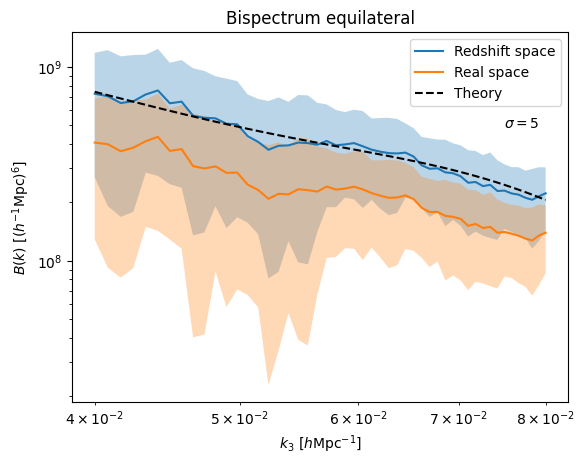

In [44]:
#plt.plot(avg_df['Theta'], avg_df['Average'], marker='', linestyle='-', color='b')
#Title = 'Bispectrum fixed' + r' $ k_1 = $ ' + str(k1) + r' $ k_2 = $' + str(k2)
#file_path = '/home/gremlin/Msc Project/plots/fin/'
#file_name = f'Averaged_Bispectrum_{grid}_k1_{k1}_k2_{k2}.png'

Title = 'Bispectrum equilateral'

sigma =5


# Plot the average line for Redshift space
plt.plot(avg_df['k'], avg_df['Average'], linestyle='-', label='Redshift space')

# Shaded region for the error in Redshift space
plt.fill_between(avg_df['k'], 
                 avg_df['Average'] - avg_df['Standard Deviation'], 
                 avg_df['Average'] + avg_df['Standard Deviation'], alpha=0.3)

# Plot the average line for Real space
plt.plot(avg_df['k'], avg_df['Average real'], linestyle='-', label='Real space')

# Shaded region for the error in Real space
plt.fill_between(avg_df['k'], 
                 avg_df['Average real'] - avg_df['Std real'], 
                 avg_df['Average real'] + avg_df['Std real'],  alpha=0.3)


plt.figtext(0.8, 0.68, f'$\sigma = {sigma}$')


plt.plot(theory_df['k3'], theory_df['Bk_norm'], marker='', linestyle='--', color='black', label='Theory')
#plt.plot(theory_df['k3'], theory_df['Bk_norm_sigma6'], marker='', linestyle='--', label='Theory')


plt.title(Title)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k_3~[h{\rm Mpc}^{-1}]$')
plt.ylabel(r'$B(k)~[(h^{-1}{\rm Mpc})^6]$')  # Adjust units if necessary
plt.legend()
#plt.savefig(file_path + file_name)
plt.show()

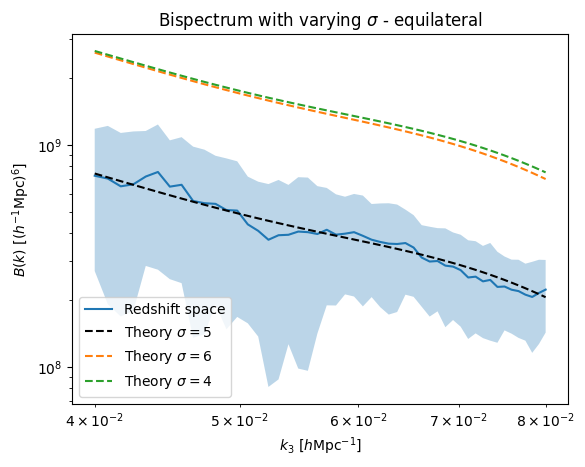

In [52]:
#plt.plot(avg_df['Theta'], avg_df['Average'], marker='', linestyle='-', color='b')
#Title = 'Bispectrum fixed' + r' $ k_1 = $ ' + str(k1) + r' $ k_2 = $' + str(k2)
#file_path = '/home/gremlin/Msc Project/plots/fin/'
#file_name = f'Averaged_Bispectrum_{grid}_k1_{k1}_k2_{k2}.png'

Title = f'Bispectrum with varying $\sigma$ - equilateral'

sigma =5


# Plot the average line for Redshift space
plt.plot(avg_df['k'], avg_df['Average'], linestyle='-', label='Redshift space')

# Shaded region for the error in Redshift space
plt.fill_between(avg_df['k'], 
                 avg_df['Average'] - avg_df['Standard Deviation'], 
                 avg_df['Average'] + avg_df['Standard Deviation'], alpha=0.3)

# # Plot the average line for Real space
# plt.plot(avg_df['k'], avg_df['Average real'], linestyle='-', label='Real space')

# # Shaded region for the error in Real space
# plt.fill_between(avg_df['k'], 
#                  avg_df['Average real'] - avg_df['Std real'], 
#                  avg_df['Average real'] + avg_df['Std real'],  alpha=0.3)


#plt.figtext(0.8, 0.68, f'$\sigma = {sigma}$')


plt.plot(theory_df['k3'], theory_df['Bk_norm_sigma5'], marker='', linestyle='--', color='black', label=f'Theory $\sigma = 5$')
plt.plot(theory_df['k3'], theory_df['Bk_norm_sigma6'], marker='', linestyle='--', label=f'Theory $\sigma = 6$')
plt.plot(theory_df['k3'], theory_df['Bk_norm_sigma4'], marker='', linestyle='--', label=f'Theory $\sigma = 4$')
#plt.plot(theory_df['k3'], theory_df['Bk_norm_sigma5.5'], marker='', linestyle='--', label='Theory')



plt.title(Title)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k_3~[h{\rm Mpc}^{-1}]$')
plt.ylabel(r'$B(k)~[(h^{-1}{\rm Mpc})^6]$')  # Adjust units if necessary
plt.legend()
#plt.savefig(file_path + file_name)
plt.show()

# Analysis of fit

<function matplotlib.pyplot.show(close=None, block=None)>

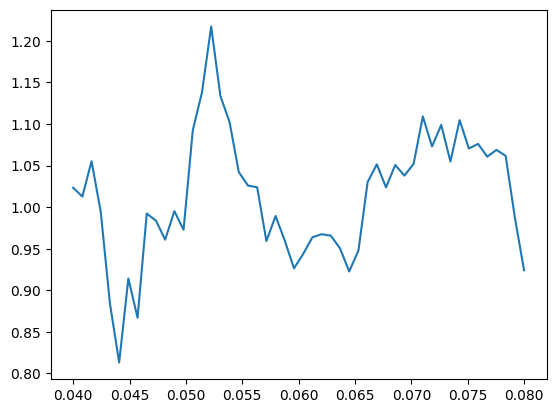

In [12]:
x = avg_df['Average'] / theory_df['Bk_norm']

plt.plot(avg_df['k'], 1/x)
plt.show

In [16]:
#KS test
from scipy.stats import ks_2samp

observed_avg = avg_df['Average']
expected = theory_df['Bk_norm_sigma5']
# print(observed_avg)
# print(expected)


# Perform KS test
ks_stat, p_value = ks_2samp(observed_avg, expected)

print(f"KS Statistic: {ks_stat}, p-value: {p_value}")

KS Statistic: 0.14, p-value: 0.7166468440414822


In [46]:
observed_avg = avg_df['Average']
expected = theory_df['Bk_norm']
std = avg_df['Standard Deviation']

#print(observed_avg)
# print(expected)
# print(std)

chi = ((observed_avg - expected)**2)/((std/np.sqrt(len(observed_avg)))**2)

sum_chi = sum(chi)

dof = len(observed_avg)

print("---------------")
print(sum_chi)

print(sum_chi/dof)

---------------
49.058674901414996
0.9811734980282999


In [42]:
print(expected)

0     7.433332e+08
1     7.141233e+08
2     6.867021e+08
3     6.608885e+08
4     6.367942e+08
5     6.141454e+08
6     5.929343e+08
7     5.731614e+08
8     5.546297e+08
9     5.372787e+08
10    5.211461e+08
11    5.060911e+08
12    4.919980e+08
13    4.787902e+08
14    4.663978e+08
15    4.547806e+08
16    4.438825e+08
17    4.336092e+08
18    4.238979e+08
19    4.146892e+08
20    4.059300e+08
21    3.975725e+08
22    3.895694e+08
23    3.818696e+08
24    3.744247e+08
25    3.671920e+08
26    3.601340e+08
27    3.532173e+08
28    3.464123e+08
29    3.396936e+08
30    3.330390e+08
31    3.264274e+08
32    3.198380e+08
33    3.132502e+08
34    3.066385e+08
35    3.000034e+08
36    2.933425e+08
37    2.866550e+08
38    2.799421e+08
39    2.732068e+08
40    2.664367e+08
41    2.596389e+08
42    2.528347e+08
43    2.460324e+08
44    2.392403e+08
45    2.324457e+08
46    2.256723e+08
47    2.189454e+08
48    2.122763e+08
49    2.056670e+08
Name: Bk_norm, dtype: float64


In [43]:
print(std)

0     4.566165e+08
1     5.139909e+08
2     4.823816e+08
3     4.860917e+08
4     4.358788e+08
5     4.816230e+08
6     4.006152e+08
7     4.231733e+08
8     4.240840e+08
9     4.062396e+08
10    3.514544e+08
11    3.611373e+08
12    3.381999e+08
13    2.815019e+08
14    2.731465e+08
15    2.926141e+08
16    3.039728e+08
17    2.671583e+08
18    3.087769e+08
19    3.084671e+08
20    2.555512e+08
21    2.254858e+08
22    2.051057e+08
23    1.861786e+08
24    1.970699e+08
25    2.021167e+08
26    1.678985e+08
27    1.796964e+08
28    1.870474e+08
29    1.811070e+08
30    1.498756e+08
31    1.379567e+08
32    1.242342e+08
33    1.297305e+08
34    1.219428e+08
35    1.349057e+08
36    1.203722e+08
37    1.210636e+08
38    1.191186e+08
39    1.133819e+08
40    1.079850e+08
41    1.152089e+08
42    1.007768e+08
43    8.410354e+07
44    8.149175e+07
45    8.436567e+07
46    8.021450e+07
47    9.083748e+07
48    8.851940e+07
49    8.025243e+07
Name: Standard Deviation, dtype: float64


SNR = 0     1.590869
1     1.371917
2     1.348968
3     1.367385
4     1.652924
5     1.568295
6     1.619060
7     1.562445
8     1.317990
9     1.344531
10    1.543219
11    1.408161
12    1.495428
13    1.557064
14    1.500287
15    1.276670
16    1.287986
17    1.472374
18    1.317303
19    1.310329
20    1.551452
21    1.838206
22    1.919853
23    2.137424
24    2.051039
25    1.925021
26    2.225704
27    2.031783
28    1.917847
29    1.973551
30    2.408485
31    2.496907
32    2.499111
33    2.296337
34    2.456330
35    2.116512
36    2.347858
37    2.250559
38    2.118812
39    2.245613
40    2.245198
41    2.136466
42    2.271136
43    2.732498
44    2.728103
45    2.597475
46    2.632039
47    2.270099
48    2.428373
49    2.773307
dtype: float64


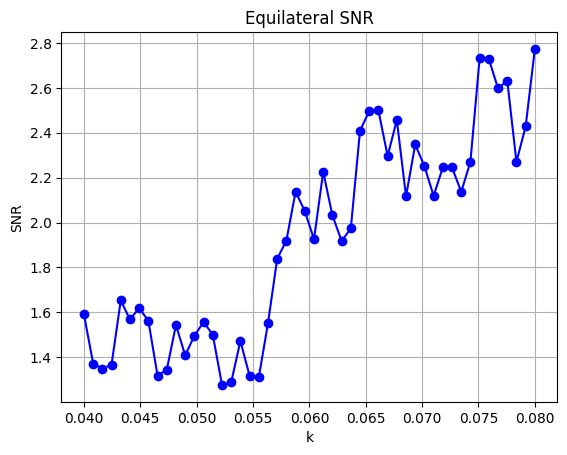

In [47]:
#SNR test

snr = avg_df['Average']/avg_df['Standard Deviation']

print(f'SNR = {snr}')

# Assuming 'snr' is a pandas Series with SNR values for each bin
#plt.figure(figsize=(10, 6))
plt.plot(avg_df['k'],snr, marker='o', linestyle='-', color='b')
plt.title('Equilateral SNR')
plt.xlabel(r'k')
plt.ylabel('SNR')
plt.grid(True)
plt.show()

In [48]:
# Calculate the sum in quadrature
snr_total = np.sqrt(np.sum(snr**2))

# Print the result
print("Total SNR (sum in quadrature):", snr_total)

Total SNR (sum in quadrature): 14.034240926652666
